In [ ]:
# Mount Google Drive to access your custom dataset
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import layers  # Import the layers module from TensorFlow

drive.mount('/content/drive')

# Load and preprocess your custom dataset
# Example code using tf.data API:
dataset_path = '/content/drive/MyDrive/custom_dataset'
batch_size = 32

# Create a data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    # Add more augmentation techniques if needed
])

# Create a tf.data.Dataset from your custom dataset
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(224, 224),
    batch_size=batch_size,
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(224, 224),
    batch_size=batch_size,
)

# Preprocess the dataset (e.g., normalize pixel values)
# You can also apply data augmentation here if needed.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 38 files belonging to 4 classes.
Using 31 files for training.
Found 38 files belonging to 4 classes.
Using 7 files for validation.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load pre-trained EfficientNetB0 without top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False


In [ ]:
from tensorflow.keras import layers, models
num_classes= 4
# Build your custom model on top of the pre-trained base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
epochs = 50  # You can adjust the number of epochs based on the training progress
model.fit(ds_train, epochs=epochs, validation_data=ds_val)


Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 1.2719 - accuracy: 0.5484 - val_loss: 1.7138 - val_accuracy: 0.1429
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 1.1489 - accuracy: 0.6129 - val_loss: 1.6625 - val_accuracy: 0.1429
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.0400 - accuracy: 0.6452 - val_loss: 1.6127 - val_accuracy: 0.1429
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 1.0372 - accuracy: 0.6129 - val_loss: 1.5541 - val_accuracy: 0.1429
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.9310 - accuracy: 0.6129 - val_loss: 1.4925 - val_accuracy: 0.1429
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.8621 - accuracy: 0.6774 - val_loss: 1.4294 - val_accuracy: 0.1429
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.8114 - accuracy: 0.7097 - val_loss: 1.3597 - val_accuracy: 0.1429
Epoch 8/50
1/1 [=======================

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_val)
test_accuracy_percentage = test_accuracy * 100
print(f'Test accuracy: {test_accuracy_percentage:.2f}%')



1/1 [==============================] - 1s 1s/step - loss: 0.4589 - accuracy: 0.8571
Test accuracy: 85.71%


1/1 [==============================] - 2s 2s/step


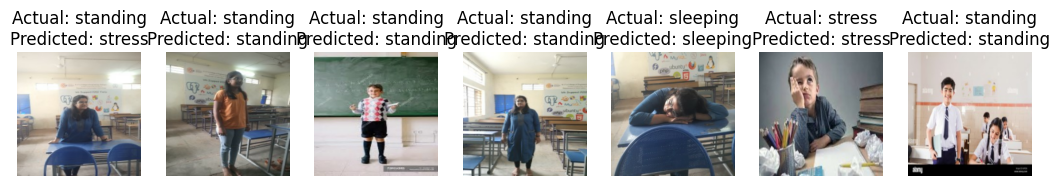

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming your dataset has 4 classes
class_names = ['hand_on_desk', 'sleeping', 'standing', 'stress']

# Function to plot images with actual and predicted class labels
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_label = class_names[labels[i]]
        if predictions is not None:
            predicted_label = class_names[predictions[i]]
            plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
        else:
            plt.title(f'Actual: {actual_label}')
        plt.axis("off")
    plt.show()

# Get a batch of images and labels from the validation dataset
for images, labels in ds_val.take(1):
    # Make predictions using the model
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    # Plot the images with actual and predicted class labels
    plot_images(images, labels, predicted_classes)


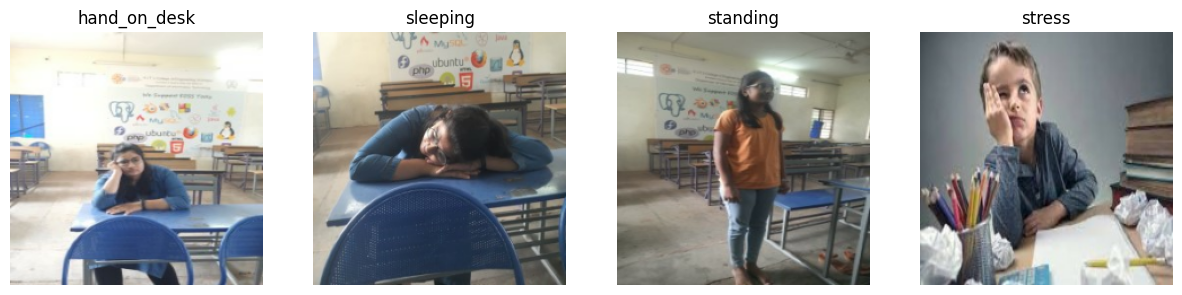

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming your dataset has 4 classes
class_names = ['hand_on_desk', 'sleeping', 'standing', 'stress']

# Function to plot class labels versus images
def plot_class_images(images, labels):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Get one image for each class from the validation dataset
class_images = []
class_labels = []

# Get one image and label for each class from the validation dataset
for class_idx, class_name in enumerate(class_names):
    # Find the first image with the current class label
    for images, labels in ds_val:
        for i, label in enumerate(labels):
            if label == class_idx:
                image = images[i]
                break
        break
    class_images.append(image)
    class_labels.append(class_idx)

# Plot class labels versus images
plot_class_images(class_images, class_labels)
